<a href="https://colab.research.google.com/github/saidineshpola/Knowledge-Distillation-Toolkit/blob/main/Amazon_KDD_cup22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Wed May 11 11:24:30 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Logging Aicrowd

In [2]:
# Login to AIcrowd
!pip install aicrowd-cli > /dev/null
#!aicrowd login

########## or ################
# Get your API key from https://www.aicrowd.com/participants/me
API_KEY = "61a473a8ff6ff34c77e7f9f8544ef7dd"
!aicrowd login --api-key $API_KEY
#alternatively copy files from drive

from google.colab import drive
drive.mount('/content/drive')


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
API Key valid
Gitlab oauth token invalid or absent.
It is highly recommended to simply run `aicrowd login` without passing the API Key.
Saved details successfully!
Mounted at /content/drive


In [ ]:
# List dataset for this challenge
!aicrowd dataset list -c esci-challenge-for-improving-product-search

# Download dataset
!aicrowd dataset download -c esci-challenge-for-improving-product-search 0 1 2 3

In [ ]:
!unzip "*.zip"
%cp -r /content/data/processed/public/task_1_query-product_ranking/ .
!rm -r *.zip

Archive:  test_public-v0.2.csv.zip
  inflating: data/processed/public/task_1_query-product_ranking/test_public-v0.2.csv  

Archive:  train-v0.2.csv.zip
  inflating: data/processed/public/task_1_query-product_ranking/train-v0.2.csv  

Archive:  product_catalogue-v0.2.csv.zip
  inflating: data/processed/public/task_1_query-product_ranking/product_catalogue-v0.2.csv  

3 archives were successfully processed.


In [ ]:
%cd /content/task_1_query-product_ranking/
import numpy as np
import pandas as pd
product_df = pd.read_csv('product_catalogue-v0.2.csv')
test_df = pd.read_csv('test_public-v0.2.csv')
train_df = pd.read_csv('train-v0.2.csv')
# train_df = train_df.merge(product_df,left_on = ['product_id','query_locale'],right_on=['product_id','product_locale'], how= 'left')
# test_df = test_df.merge(product_df,left_on = ['product_id','query_locale'],right_on=['product_id','product_locale'], how= 'left')

/content/task_1_query-product_ranking


In [ ]:
train_df.head()

,query_id,query,query_locale,product_id,esci_label
0,0,!awnmower tires without rims,us,B00004RA3F,irrelevant
1,0,!awnmower tires without rims,us,B0018TWDOI,exact
2,0,!awnmower tires without rims,us,B005O5Y3QI,exact
3,0,!awnmower tires without rims,us,B0089RA0HY,substitute
4,0,!awnmower tires without rims,us,B0089RNSNM,exact


In [ ]:
product_df.head()

,product_id,product_title,product_description,product_bullet_point,product_brand,product_color_name,product_locale
0,B0188A3QRM,"Amazon Basics Woodcased #2 Pencils, Unsharpene...",NaN,144 woodcase #2 HB pencils made from high-qual...,Amazon Basics,Yellow,us
1,B075VXJ9VG,"BAZIC Pencil #2 HB Pencils, Latex Free Eraser,...",<p><strong>BACK TO BAZIC</strong></p><p>Our go...,&#11088; UN-SHARPENED #2 PREMIUM PENCILS. Each...,BAZIC Products,12-count,us
2,B07G7F6JZ6,Emraw Pre Sharpened Round Primary Size No 2 Ju...,<p><b>Emraw Pre-Sharpened #2 HB Wood Pencils -...,✓ PACK OF 8 NUMBER 2 PRESHARPENED BEGINNERS PE...,Emraw,Yellow,us
3,B07JZJLHCF,Emraw Pre Sharpened Triangular Primary Size No...,<p><b>Emraw Pre-Sharpened #2 HB Wood Pencils -...,✓ PACK OF 6 NUMBER 2 PRESHARPENED BEGINNERS PE...,Emraw,Yellow,us
4,B07MGKC3DD,"BIC Evolution Cased Pencil, #2 Lead, Gray Barr...",NaN,Premium #2 HB lead pencils with break-resistan...,Design House,Gray,us


In [ ]:
train_df = train_df.merge(product_df,left_on = ['product_id','query_locale'],right_on=['product_id','product_locale'], how= 'left')
test_df = test_df.merge(product_df,left_on = ['product_id','query_locale'],right_on=['product_id','product_locale'], how= 'left')

In [ ]:
print("Total number of train data = " , train_df.shape[0])
print("Total number of test data = " , test_df.shape[0])
print("Total number of product = " , product_df.shape[0])

Total number of train data =  781738
Total number of test data =  167799
Total number of product =  883868


### Printing first row

In [ ]:
row = dict(train_df.iloc[0,:])
for name, value in row.items():
    print(f'{name}:{value}')

query_id:0
query:!awnmower tires without rims
query_locale:us
product_id:B00004RA3F
esci_label:irrelevant
product_title:American Lawn Mower Company 1204-14 14-Inch 4-Blade Push Reel Lawn Mower, Red
product_description:nan
product_bullet_point:4-blade reel with a cutting width of 14” and durable 8.5” polymer wheels for maximum maneuverability
Mechanical lawn mower with an adjustable blade height of 0.5”-1.75” with scissor action cut
Manual grass cutter blades made of heat-treated alloy steel that stays sharp for years
Environment-friendly alternative to gas-powered lawn mowers which is pollution-free and noise-free; Low maintenance, lightweight and easy to use
Capable of cutting grass up to 4 inches tall
product_brand:American Lawn Mower Company
product_color_name:Red
product_locale:us


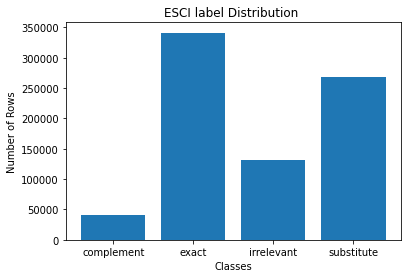

In [ ]:
import matplotlib.pylab as plt
plt.bar(
    x = np.unique(train_df["esci_label"]),
    height = [list(train_df["esci_label"]).count(i) for i in np.unique(train_df["esci_label"])] , 
) 
plt.xlabel("Classes")
plt.ylabel("Number of Rows")
plt.title('ESCI label Distribution ')
plt.show()

### Null Values


In [ ]:
train_df.isnull().sum()

query_id                     0
query                        0
query_locale                 0
product_id                   0
esci_label                   0
product_title              100
product_description     405384
product_bullet_point    116392
product_brand            60805
product_color_name      300815
product_locale               0
dtype: int64

### String filter distribution

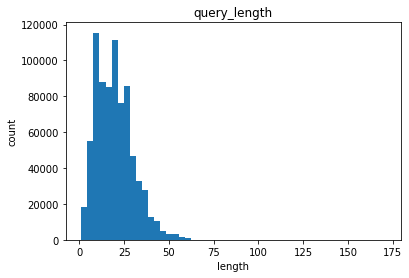

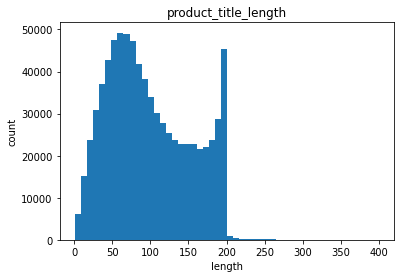

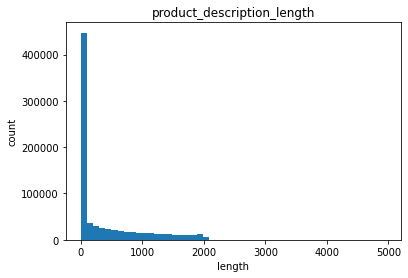

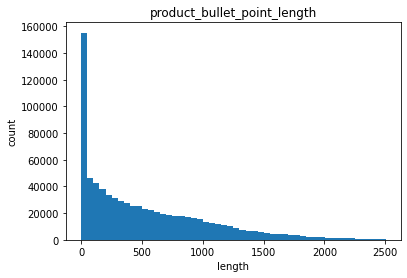

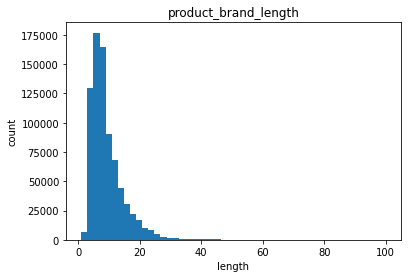

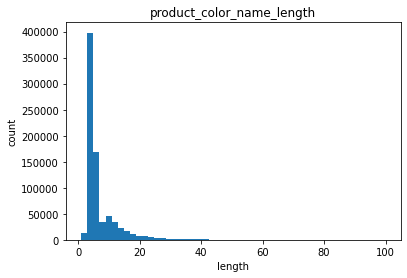

In [ ]:
lens = lambda x: len(str(x))
length_train_df = pd.DataFrame()
for name in train_df.columns:
    if ('product' in name or 'query' in name) and ('locale' not in name and 'id' not in name):
        length_train_df[f'{name}_length'] = train_df[name].apply(lens)
for name in length_train_df.columns:
    plt.hist(length_train_df[name],bins=50)
    plt.xlabel("length")
    plt.ylabel("count")
    plt.title(name)
    plt.show()

### Token Length In A PreTrained Model

In [ ]:
!pip install transformers

In [ ]:
from tqdm.notebook import tqdm
from transformers import AutoTokenizer
flag=True
tokenizer = AutoTokenizer.from_pretrained('bert-base-multilingual-cased')
df = train_df.sample(100000,random_state= 2022)
token_len = []
bar = tqdm(df.iterrows(),total=df.shape[0])
for i, row in bar:
    text = [row['query'], row['product_title'], row['product_bullet_point'], row['product_brand'],
            row['product_color_name'], row['product_locale'], row['product_description']]
    text = [str(i) for i in text]
    if flag:
      print(tokenizer.sep_token)
      flag=False
    text = f' {tokenizer.sep_token} '.join(text)
    encoded_text = tokenizer.encode_plus(text, add_special_tokens=False)
    input_ids = encoded_text["input_ids"]
    token_len.append(len(input_ids))

ModuleNotFoundError: ignored

# esci-code

In [3]:
!git clone https://github.com/saidineshOFF/esci-code.git

Cloning into 'esci-code'...
remote: Enumerating objects: 92, done.
remote: Counting objects: 100% (92/92), done.
remote: Compressing objects: 100% (80/80), done.
remote: Total 92 (delta 52), reused 29 (delta 11), pack-reused 0
Unpacking objects: 100% (92/92), done.


In [4]:
%cd /content/esci-code/data
!./download-data.sh
%cd /content/esci-code/

/content/esci-code/data
product_catalogue-v0.2.csv.zip: 100% 328M/328M [00:23<00:00, 13.8MB/s]
sample_submission-v0.2.csv: 100% 1.60M/1.60M [00:01<00:00, 1.31MB/s]
test_public-v0.2.csv.zip: 100% 1.35M/1.35M [00:01<00:00, 1.12MB/s]
train-v0.2.csv.zip: 100% 6.72M/6.72M [00:01<00:00, 3.64MB/s]
product_catalogue-v0.2.csv.zip: 100% 657M/657M [00:44<00:00, 14.9MB/s]
sample_submission-v0.2.csv: 100% 7.00M/7.00M [00:01<00:00, 4.15MB/s]
test_public-v0.2.csv.zip: 100% 4.17M/4.17M [00:01<00:00, 2.59MB/s]
train-v0.2.csv.zip: 100% 19.8M/19.8M [00:02<00:00, 7.50MB/s]
product_catalogue-v0.2.csv.zip: 100% 657M/657M [00:44<00:00, 14.8MB/s]
sample_submission-v0.2.csv: 100% 8.08M/8.08M [00:01<00:00, 4.41MB/s]
test_public-v0.2.csv.zip: 100% 4.17M/4.17M [00:01<00:00, 2.49MB/s]
train-v0.2.csv.zip: 100% 20.3M/20.3M [00:02<00:00, 7.73MB/s]
/content/esci-code


In [1]:
#!pip install -r /content/esci-code/requirements.txt >> /dev/null
#!pip install pytorch_lightning
%cd /content/esci-code/ranking
!/content/esci-code/ranking/launch-experiments-task1.sh

/content/esci-code/ranking
/usr/local/lib/python3.7/dist-packages/transformers/configuration_utils.py:337: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  "Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 "
Traceback (most recent call last):
  File "train.py", line 178, in <module>
    main()
  File "train.py", line 149, in main
    callbacks=[early_stop_callback,checkpoint_callback]
TypeError: fit() got an unexpected keyword argument 'callbacks'
Traceback (most recent call last):
  File "train.py", line 178, in <module>
    main()
  File "train.py", line 63, in main
    df_product_catalogue = pd.read_csv(args.product_catalogue_path_file)
  File "/usr/local/lib/python3.7/dist-packages/pandas/io/parser

In [ ]:
!pip install pytorch_lightning

In [8]:
%cd /content/esci-code/ranking
!/content/esci-code/ranking/launch-predictions-task1.sh

/content/esci-code/ranking
/usr/local/lib/python3.7/dist-packages/transformers/configuration_utils.py:337: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  "Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 "
100% 356/356 [01:56<00:00,  3.06it/s]
/usr/local/lib/python3.7/dist-packages/transformers/configuration_utils.py:337: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  "Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in 

In [ ]:
!aicrowd submission create -c esci-challenge-for-improving-product-search -f /content/esci-code/ranking/hypothesis/task_1_ranking_model.csv 